## 海面水温

地図だけでなく値を描画してみよう。ここでは海面水温データ[HadISST1](http://www.metoffice.gov.uk/hadobs/hadisst/)を使う。

[download page](http://www.metoffice.gov.uk/hadobs/hadisst/data/download.html)から`HadISST1_SST_update.nc.gz`をダウンロードする。拡張子`.gz`（[gzip](http://www.gzip.org)圧縮）が付いているが，圧縮されていない場合は，拡張子`.gz`削除する。圧縮されている場合は解凍する。Windowsにはgzipを扱う機能はないので，[7-Zip](https://sevenzip.osdn.jp)などを用いる。

### NetCDF

`nc`（[NetCDF](https://www.unidata.ucar.edu/software/netcdf/)）を読むには[netCDF4 python](http://unidata.github.io/netcdf4-python/)を用いる。

In [1]:
import netCDF4 as nc4

dataset = nc4.Dataset('HadISST1_SST_update.nc')

`netcdf_dataset(ファイル名)`は`Dataset`を作成する。`Dataset`は座標軸や変数などをまとめたものである。`Dataset`から変数を読むには`variables`メソッドを用いる。

In [2]:
sst = dataset.variables['sst']

1月のデータを描画してみる。

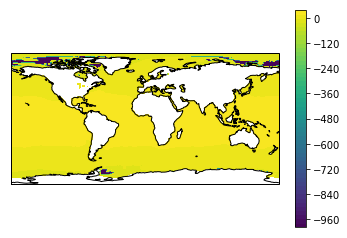

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lon, lat, sst[0,], 60, transform=ccrs.PlateCarree())
plt.colorbar()

ax.coastlines()

plt.show()

おかしな図になってしまった。[データ形式](http://www.metoffice.gov.uk/hadobs/hadisst/data/Read_instructions_sst.txt)を確認すると，海氷に覆われているところに-1000が入っている。確認してみる。

In [4]:
sst[0,:,180]

masked_array(data = [-1000.0 -1000.0 -1.7999999523162842 -1.7999999523162842
 -1.7999999523162842 -1.7999999523162842 -1.7999999523162842
 -1.7999999523162842 -1.7999999523162842 -1.3447265625 -0.15625
 1.0224127769470215 1.7339876890182495 2.135985851287842 1.9301509857177734
 1.3141674995422363 1.8001981973648071 2.6573405265808105 3.610403299331665
 4.4060893058776855 5.157680988311768 5.751012802124023 6.087249755859375
 6.243302345275879 6.439548492431641 6.810280799865723 7.357912063598633
 7.942025184631348 8.291414260864258 8.346809387207031 8.331205368041992
 8.400185585021973 8.414026260375977 8.284310340881348 8.080513000488281
 7.885481357574463 7.802855491638184 -- -- 9.766984939575195
 9.766984939575195 -- -- -- -- -- -- -- -- 14.950439453125
 15.034799575805664 15.309090614318848 15.588996887207031
 15.678974151611328 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- 28.66602897644043 28.807947158813477
 28.998897552490234 28.9938

確かに北極に近いところに-1000が入っている。`sst`はデータが格納されている`data`だけでなく，`True, False`が格納されている`mask`から構成されている。このような配列を[Masked Array](https://docs.scipy.org/doc/numpy/reference/maskedarray.html)という。-1000もマスクすれば絵が描けそうだ。

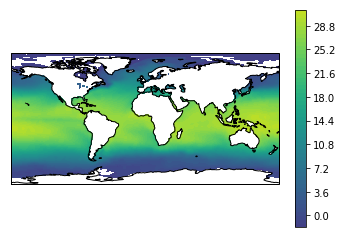

In [5]:
import numpy.ma as ma
import netCDF4 as nc4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

dataset = nc4.Dataset('HadISST1_SST_update.nc')

ice_covered = -1000
sst = ma.masked_values(dataset.variables['sst'][0, :, :], ice_covered)
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lon, lat, sst, 60, transform=ccrs.PlateCarree(), vmin = -10.0, vmax = 35.0)
plt.colorbar()

ax.coastlines()

plt.show()

### テキストデータ

NetCDFは軸の情報などが付加されていて便利であるが，HadISSTにはテキストデータで提供されているものがある。2004年のデータを読んでみよう。取得し解凍してから，1行読んでみる。

In [6]:
fin = open('HadISST1_SST_2004.txt', 'rt')
fin.readline()

'     1     1  2004   180 rows    360 columns\n'

[データ形式](http://www.metoffice.gov.uk/hadobs/hadisst/data/Read_instructions_sst.txt)のとおり，最初の行はヘッダのようだ。次の行は北極に一番近い緯度円（89.5N）のデータ。

In [7]:
fin.readline()

' -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1

全て海氷だ。少し読み飛ばしてみる。

In [8]:
for j in range(20):
    fin.readline()
fin.readline()

'-32768-32768  -180  -180  -180  -180  -180  -180  -180  -180  -180  -180  -132   -58-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768  -180  -180  -180  -180  -180  -180  -180  -180-32768-32768  -180  -180  -180  -180  -180  -180  -180-32768-32768  -180  -180-32768-32768-32768-32768-32768-32768  -180 -1000-32768-32768-32768-32768  -180  -180  -180 -1000 -1000 -1000  -180 -1000-32768-32768-32768-32768-32768-32768  -180  -180 -1000 -1000 -1000  -180  -180  -180  -180  -180  -167   -64    15    34    38    18-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768-32768 -1000 -1000  -180    59    82   149   211   247   259   261   268   275   275   264   

-32768は陸地で海面水温のないところ。NetCDFでは`mask`が`True`となっていた。面倒なことに-32768の前には空白が省略されている。-1000に置き換えることにする。テキストの置き換えには，標準モジュール`re`を使う。

In [9]:
import re
land = -32768
seaice = -1000
re.sub(str(land), ' '+str(seaice), fin.readline())

' -1000 -1000 -1000 -1000 -1000  -180  -180  -180  -180  -180  -180  -180  -170   -98   -58   -11 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000  -180 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000  -180  -180 -1000 -1000 -1000 -1000  -180  -180 -1000  -180 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000  -180  -180  -180  -160  -123   -12    43    59 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000  -180  -180  -180  -117   -59   -16    93   205   220   303   350   366   369   366   364   356   347   339   320   

緯度円上のデータが一つの文字列になっている。空白で区切り文字列をリストに分解する。

In [10]:
re.sub(str(land), ' '+str(seaice), fin.readline()).split()

['-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-180',
 '-180',
 '-161',
 '-170',
 '-115',
 '-50',
 '-82',
 '-180',
 '-180',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-1000',
 '-180',
 '-180',
 '-1000',
 '-1000',
 '-

リストを`numpy`の整数の配列に型変換する。

In [11]:
import numpy as np
np.array(re.sub(str(land), ' '+str(seaice), fin.readline()).split()).astype(int)

array([  -62,    13,    88, -1000, -1000, -1000, -1000, -1000,   -82,
         -90,  -115,   -90,  -132, -1000, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000, -1000,  -166,  -180,  -180,
       -1000, -1000,  -180,  -180,  -180, -1000, -1000, -1000, -1000,
       -1000, -1000, -1000, -1000, -1000,  -180,  -180, -1000, -1000,
        -180,  -180,  -180,  -108,   -17,    57,   110,   135,   134,
         124, -1000,

以上をまとめて関数にする。

In [12]:
import re
import numpy as np
import numpy.ma as ma

nx = 360; ny = 180
def read_hadisst(fname, m):
    fin = open(fname, 'rt')
    sst = ma.zeros((m, ny, nx))
    land = -32768
    seaice = -1000
    for k in range(m):
        fin.readline()
        for j in range(ny):
            line = re.sub(str(land), ' '+str(seaice), fin.readline())
            sst[k, j, :] = ma.masked_equal(np.array(line.split()).astype(int), seaice) * 0.01
    fin.close()
    return sst

In [13]:
sst = read_hadisst('HadISST1_SST_2004.txt', 12)

In [14]:
sst.shape

(12, 180, 360)

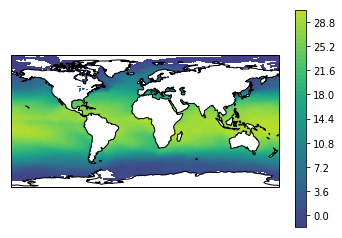

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lon, lat, sst[0,:,:], 60, transform=ccrs.PlateCarree(), vmin = -10.0, vmax = 35.0)
plt.colorbar()

ax.coastlines()

plt.show()